In [446]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [447]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [448]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [449]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,15078.0,67981.0,39458.2,53692.0,17636.0,0.1715,26286.5,0.9585,-1.2503,2.6169,38905.0
GDPDEF,33.2392,124.163,55.5963,83.761,13.42,0.2226,20.5978,0.9569,-1.2157,1.6726,55.2795
TB3MS,3.169,14.39,4.1599,5.705,0.03,0.9892,1.75,0.8736,1.2373,1.3127,3.89
GS10,2.8998,14.29,5.4985,7.3125,1.32,0.9367,3.445,0.9292,0.5291,1.8961,4.725
Price_10Y,1696.97,5318.51,1572.47,2695.96,103.357,0.8485,165.936,0.9684,-0.7847,0.9266,695.429
Stock_Price,1144.93,5011.96,854.949,1283.92,24.84,1.8757,92.205,0.8853,3.1229,0.7467,287.45
Dividend,18.0439,70.6511,16.4021,22.2008,1.4167,1.5142,3.1125,0.9253,1.3575,0.909,9.4
E,46.9804,197.883,39.1208,55.4942,2.4567,1.6771,5.735,0.8617,2.3112,0.8327,16.3017
CAPE,8.1611,42.1856,20.7752,26.3734,7.1818,0.4615,15.1749,0.8962,-0.3087,2.5456,20.4852


nothing

In [450]:
freq = 1

cpi = percentchange(data_source[:GDPDEF], :log) .* 100
gdp = percentchange(data_source[:A939RX0Q048SBEA], :log) .* 100
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
Δd = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) .- cpi

dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,1.54,3.58,1.7246,3.0028,-4.1876,-1.6545,0.981,0.3009,4.3411,1.1199,1.7824
GDPDEF,1.1531,6.7639,2.3429,2.5714,0.5552,1.7489,1.8625,0.5675,4.2844,2.0318,2.0163
TB3MS_GDPDEF,2.4664,4.7148,0.8791,3.0364,-6.4539,-0.3867,-0.7972,0.7299,0.101,0.3564,0.5763
GS10_TB3MS,1.224,3.61,1.6328,2.7025,-1.07,-0.2468,0.6675,0.491,-0.5856,1.3339,1.655
Dividend_GDPDEF,6.3915,14.4243,3.3838,7.4514,-23.0452,-1.6696,0.7085,0.4432,5.5506,0.5294,3.648
Dividend_Stock_Price,0.3321,-3.17,-3.8705,-3.5925,-4.42,0.3718,-4.1,0.7846,-0.8387,-11.6556,-3.925


nothing

6×6 Matrix{Float64}:
  1.0        0.186541    0.23559     -0.111771   0.163217    -0.180486
  0.186541   1.0        -0.101428    -0.237447   0.108673     0.0916719
  0.23559   -0.101428    1.0         -0.244165  -0.00978025   0.377249
 -0.111771  -0.237447   -0.244165     1.0       -0.294501     0.372277
  0.163217   0.108673   -0.00978025  -0.294501   1.0          0.0636524
 -0.180486   0.0916719   0.377249     0.372277   0.0636524    1.0

In [451]:
s_data

40×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 1985-01-01 to 2024-01-01
┌────────────┬─────────────────┬──────────┬──────────────┬────────────┬─────────
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS_GDPDEF │ GS10_TB3MS │ Divide ⋯
├────────────┼─────────────────┼──────────┼──────────────┼────────────┼─────────
│ 1985-01-01 │         3.57999 │  3.46524 │      4.71476 │        3.4 │        ⋯
│ 1986-01-01 │         3.14693 │  2.29697 │      4.60303 │       1.66 │        ⋯
│ 1987-01-01 │         1.78246 │  1.96793 │      3.57207 │       1.65 │        ⋯
│ 1988-01-01 │           3.251 │  3.01971 │      2.70029 │        2.7 │        ⋯
│ 1989-01-01 │         3.30513 │   4.0545 │       4.4855 │       0.67 │        ⋯
│ 1990-01-01 │         1.78235 │  3.57025 │      4.18975 │       0.66 │        ⋯
│ 1991-01-01 │        -2.28046 │  3.68325 │      2.33675 │        2.0 │        ⋯
│ 1992-01-01 │         1.50942 │  2.47236 │      1.41764 │       3.41 │        ⋯
│     ⋮      │        ⋮        │  

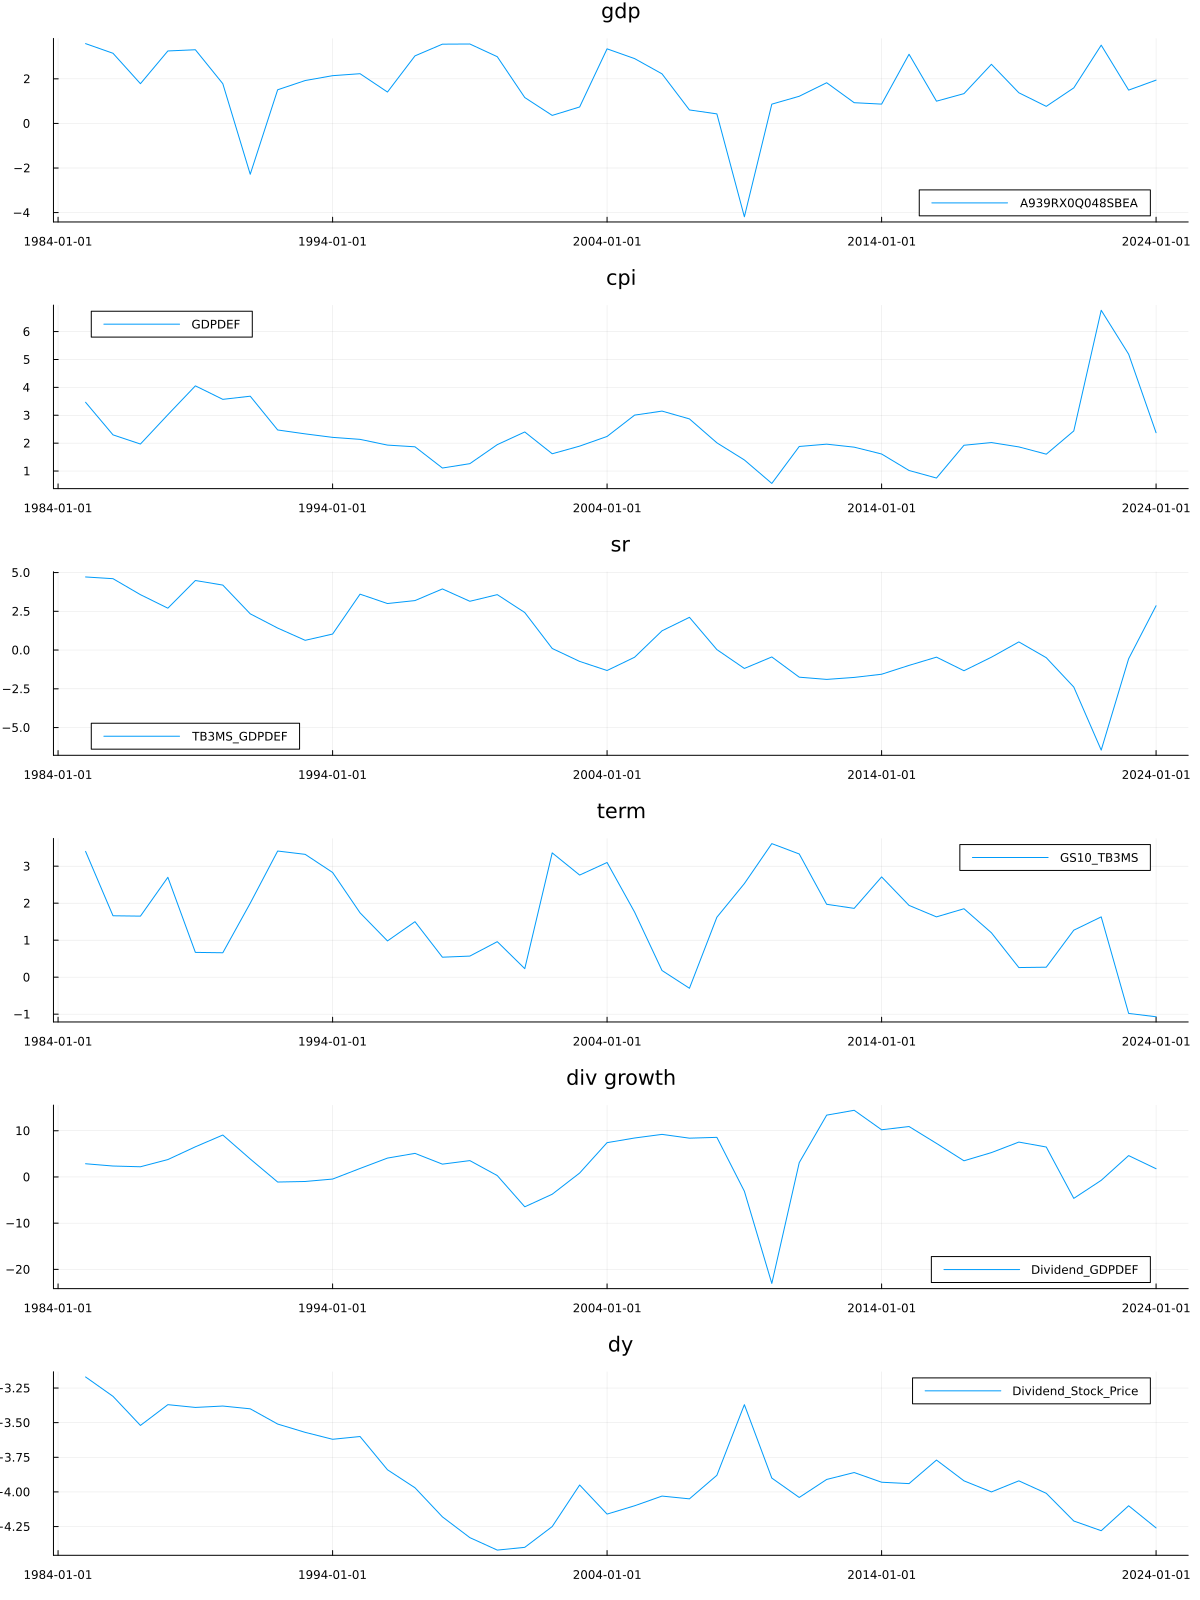

In [452]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [453]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA,1.1308,0.3596,-0.0965,-0.0036,0.225,-0.0356,0.027,1.492
GDPDEF,3.5556,0.242,0.4588,-0.1355,-0.1397,-0.052,0.5709,0.9172
TB3MS_GDPDEF,-0.883,0.3001,0.6305,0.7316,0.2398,0.0275,0.3723,1.3337
GS10_TB3MS,1.5006,-0.4437,-0.2016,0.127,0.4997,-0.0086,-0.1024,0.6945
Dividend_GDPDEF,-5.9566,2.0129,-0.0226,-0.4696,1.0657,0.4293,-0.7905,5.0931
Dividend_Stock_Price,-1.5864,0.0014,0.0465,0.0147,0.0686,0.0088,0.6663,0.1593


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA,1.0,0.14,0.22,-0.25,0.09,-0.64
GDPDEF,0.14,1.0,-0.62,0.16,0.03,0.08
TB3MS_GDPDEF,0.22,-0.62,1.0,-0.53,-0.18,-0.29
GS10_TB3MS,-0.25,0.16,-0.53,1.0,0.12,0.39
Dividend_GDPDEF,0.09,0.03,-0.18,0.12,1.0,0.18
Dividend_Stock_Price,-0.64,0.08,-0.29,0.39,0.18,1.0


In [454]:
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods = [1,5, 15, 25]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.9428,2.3732,2.8568,-1.07,1.7768,-4.26
5,1.5498,2.2659,0.9394,0.7957,0.8256,-4.2733
15,1.567,2.2893,0.1854,1.2065,2.6824,-4.1445
25,1.5624,2.3055,0.0779,1.2934,2.9162,-4.1066


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,0.0,0.0,0.0,0.0,0.0,0.0
5,0.7114,0.655,0.9496,0.6128,3.3071,0.1454
15,0.4367,0.4862,0.8538,0.4283,2.3065,0.1573
25,0.3412,0.3863,0.7243,0.3458,1.8562,0.1379


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.0,1.0,1.0,1.0,NaN,1.0
5,0.0145,-0.0269,-0.0015,0.0138,-0.0017,-0.0252
15,-0.0192,-0.0202,0.0139,0.0356,0.0433,0.0199
25,-0.0259,-0.012,0.0215,0.0469,0.0044,0.0197


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,-2.0,-2.0,-2.0,-2.0,NaN,-2.0
5,-0.0015,-0.0112,-0.1567,-0.0461,-0.0242,0.0121
15,-0.0784,-0.0484,-0.0439,0.0041,0.1016,-0.0185
25,-0.0784,-0.035,0.0448,-0.0089,0.0198,-0.0099


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428
5,-0.101,0.1658,0.3856,1.075,1.542,2.0311,2.7181,2.9473,3.24
15,0.5706,0.7053,0.8359,1.2706,1.5687,1.8642,2.276,2.4203,2.5561
25,0.7808,0.8843,0.9905,1.3324,1.5698,1.7924,2.1271,2.224,2.3423


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732
5,0.7267,0.9656,1.195,1.8262,2.268,2.7035,3.3531,3.5451,3.7778
15,1.1738,1.3408,1.4742,1.9548,2.2934,2.6191,3.0768,3.2381,3.4115
25,1.4092,1.548,1.6676,2.0479,2.3073,2.5664,2.9401,3.0626,3.2024


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568
5,-1.2195,-0.9198,-0.6369,0.2955,0.9298,1.5877,2.5084,2.7796,3.1053
15,-1.7832,-1.4973,-1.2078,-0.396,0.1812,0.7714,1.5764,1.8415,2.1669
25,-1.6151,-1.3002,-1.0873,-0.4162,0.0747,0.5683,1.2722,1.5059,1.7727


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07
5,-0.6357,-0.3953,-0.2128,0.3787,0.7908,1.2086,1.8118,2.0091,2.2064
15,0.2198,0.3655,0.4955,0.9217,1.209,1.4891,1.9202,2.0684,2.2199
25,0.5083,0.6247,0.7255,1.0554,1.2895,1.5266,1.8725,1.9849,2.1162


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768
5,-6.9352,-5.5358,-4.5817,-1.4654,0.8223,3.0948,6.1965,7.2603,8.5466
15,-2.6453,-1.7998,-1.0853,1.1235,2.6527,4.2141,6.5196,7.2697,8.1114
25,-1.4093,-0.7712,-0.1452,1.6666,2.9268,4.1318,5.9787,6.5638,7.2168


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26
5,-4.6166,-4.5585,-4.5115,-4.3728,-4.2729,-4.1757,-4.038,-3.9896,-3.9381
15,-4.5085,-4.4512,-4.4038,-4.2498,-4.1451,-4.0392,-3.8821,-3.8303,-3.7764
25,-4.428,-4.3747,-4.3308,-4.1988,-4.1073,-4.0162,-3.8756,-3.8365,-3.7887


In [455]:
sr = scenarios[2, :,:] + scenarios[3, :,:] 
lr = scenarios[2, :,:] + scenarios[3, :,:] + scenarios[4, :,:] 
real_Δd = scenarios[2, :,:] + scenarios[5, :,:]
dy = exp.(scenarios[6, :,:])



print_scenarios_percentiles(sr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "sr")
print_scenarios_percentiles(lr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "lr")
print_scenarios_percentiles(cumsum(real_Δd, dims=1)[periods,:] ./ (periods.-1), [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "Δd")
print_scenarios_percentiles(dy[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "dy")



,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23
5,-2.8339,-2.0587,-1.4116,0.6158,1.9993,3.4284,5.5109,6.1188,6.8903
15,-2.9286,-2.0605,-1.2826,0.7282,2.2066,3.6813,5.8582,6.5088,7.2906
25,-2.7845,-2.0555,-1.3682,0.796,2.2492,3.7411,5.8546,6.6142,7.3869


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16
5,0.187,0.7761,1.1974,2.6481,3.6368,4.6414,6.0857,6.5619,7.1094
15,-0.2138,0.3335,0.8846,2.4632,3.6091,4.7452,6.415,6.9678,7.5593
25,-0.1985,0.3432,0.8769,2.541,3.7075,4.847,6.5339,7.0883,7.6147


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
5,-5.7249,-4.192,-2.9772,0.9723,3.8692,6.8076,10.651,11.9379,13.6439
15,-0.1164,0.6673,1.4377,3.7256,5.2646,6.9006,9.2686,10.049,10.9112
25,1.1475,1.8316,2.3886,4.2189,5.4491,6.6476,8.4363,9.0358,9.7181


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141
5,0.0081,0.0089,0.0097,0.0125,0.0149,0.0178,0.023,0.0252,0.0274
15,0.0089,0.0099,0.0108,0.0143,0.0174,0.0212,0.0281,0.0306,0.0339
25,0.0091,0.01,0.0109,0.0143,0.0174,0.0212,0.0279,0.0305,0.0335


In [456]:
real_Δd[1,:] .= 1.

div_index =values(data_source[:Dividend][end])[1] .* exp.(cumsum(real_Δd, dims=1) ./100)
price_index = div_index ./ dy
periods = [1, 5, 10, 25] * freq

eq_ret = log.((price_index[2:end,:] .+ div_index[2:end,:] ) ./ price_index[1:end-1,:])
eq_cum_ret = cumsum(eq_ret, dims=1)[periods,:] ./ periods
real_eq_ret = eq_ret .- (scenarios[2, 2:end, :] ./100)
real_eq_cum_ret = cumsum(real_eq_ret, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")
print_scenarios_percentiles(real_eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity real return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2624,-0.2016,-0.1578,-0.0072,0.0969,0.2027,0.3589,0.4085,0.4698
5,-0.1041,-0.0821,-0.0662,-0.011,0.0279,0.0655,0.1194,0.1363,0.1569
10,-0.037,-0.0254,-0.0132,0.0206,0.0439,0.0674,0.1019,0.1121,0.1251
25,0.0131,0.0217,0.028,0.048,0.0617,0.0752,0.0946,0.1006,0.1085


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2852,-0.2285,-0.182,-0.0304,0.0741,0.1781,0.335,0.382,0.4434
5,-0.1288,-0.1066,-0.0897,-0.0333,0.0053,0.0438,0.0982,0.1169,0.1371
10,-0.0623,-0.0501,-0.0384,-0.0028,0.0211,0.0454,0.0806,0.0923,0.1052
25,-0.0106,-0.0035,0.0033,0.0242,0.0384,0.0527,0.0736,0.0798,0.0877


In [457]:
mdd, mddl = max_drawdown_and_length(real_eq_ret)

display("real equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

"real equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.216836  0.326922  0.401255  0.483365  0.627257

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.0  7.0  9.0  13.0  21.0

In [458]:
eq_return = calculate_equity_returns(real_Δd, scenarios[6, :,:])
eq_cum_return = cumsum(eq_return, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_return, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2624,-0.2016,-0.1578,-0.0072,0.0969,0.2027,0.3589,0.4085,0.4698
5,-0.1041,-0.0821,-0.0662,-0.011,0.0279,0.0655,0.1194,0.1363,0.1569
10,-0.037,-0.0254,-0.0132,0.0206,0.0439,0.0674,0.1019,0.1121,0.1251
25,0.0131,0.0217,0.028,0.048,0.0617,0.0752,0.0946,0.1006,0.1085


In [459]:
percentile(eq_return[1,:], [.25, .5, .75])

3-element Vector{Float64}:
 -0.32907576842696823
 -0.2968624877024291
 -0.27656259454831644

In [460]:
bond_returns = calculate_bond_returns(lr./100, 10, 1)
bond_cum_returns = cumsum(eq_ret, dims=1)[periods,:] ./ periods

real_bond_returns = bond_returns .- (scenarios[2, 2:end, :] ./100)
real_bond_cum_returns = cumsum(real_bond_returns, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds returns")
print_scenarios_percentiles(real_bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real bonds returns")


mdd, mddl = max_drawdown_and_length(real_bond_returns)

display("real bonds")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2624,-0.2016,-0.1578,-0.0072,0.0969,0.2027,0.3589,0.4085,0.4698
5,-0.1041,-0.0821,-0.0662,-0.011,0.0279,0.0655,0.1194,0.1363,0.1569
10,-0.037,-0.0254,-0.0132,0.0206,0.0439,0.0674,0.1019,0.1121,0.1251
25,0.0131,0.0217,0.028,0.048,0.0617,0.0752,0.0946,0.1006,0.1085


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.1401,-0.1181,-0.097,-0.0353,0.0107,0.0592,0.1328,0.1574,0.1875
5,-0.0231,-0.0165,-0.0092,0.0121,0.0283,0.0453,0.0713,0.0802,0.0907
10,-0.009,-0.0046,-0.0004,0.0124,0.0215,0.0312,0.0462,0.0508,0.0567
25,-0.0018,0.0008,0.0035,0.0114,0.017,0.0226,0.0308,0.0335,0.0367


"real bonds"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.116811  0.189619  0.24663  0.313635  0.449013

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 5.0  8.0  10.0  14.0  21.0

In [489]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 10, 2, 2)



11×6 Matrix{Float64}:
  0.410064    1.83439     -1.64385    0.223065    0.32519     0.0245336
  0.015657    1.12962      0.148602  -0.654203    1.9139      0.0961595
 -0.316653    0.548787     0.757168  -0.568929   -0.0153539   0.0907446
 -0.294556    0.204643     0.701861  -0.167446   -1.69001     0.0575104
 -0.104127    0.0715388    0.488925   0.103482   -1.87659     0.0313964
  0.044863    0.0423387    0.356484   0.158447   -1.16099     0.0218838
  0.0883624   0.0326466    0.315193   0.103718   -0.424934    0.0225105
  0.0665777   0.0140773    0.299264   0.0474043  -0.0605929   0.0246506
  0.0350029  -0.00739744   0.26667    0.0273056  -0.00183398  0.0242911
  0.0192114  -0.0209229    0.216471   0.0309938  -0.0455066   0.0216686
  0.0173313  -0.0238885    0.165188   0.0368385  -0.0661568   0.0184013

In [490]:
resp[2,2] + resp[2,3]  + resp[2,4]

0.6240207195845446

gdp + 
- sr .42
- lr .25

gdp -
- sr - .42
- lr - .25

cpi +
- sr .09
- lr .2


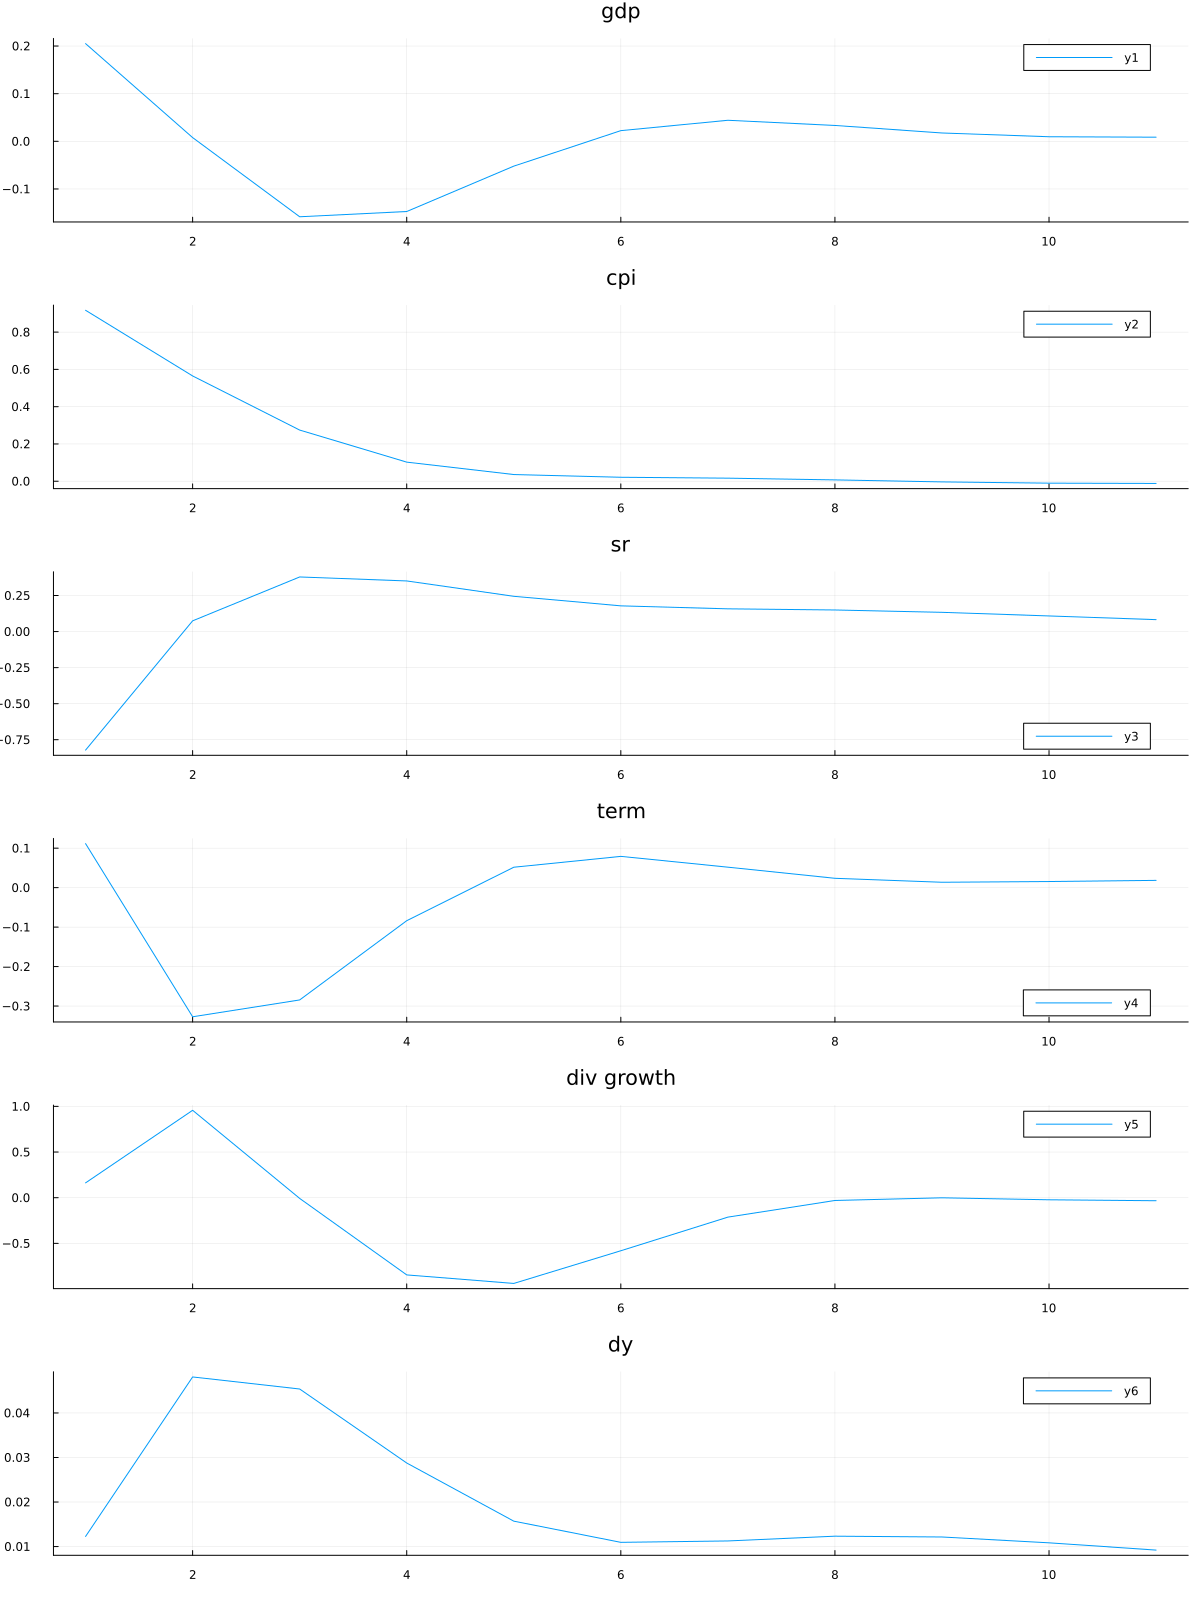

In [483]:
plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [462]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [463]:
resp

9×6 Matrix{Float64}:
  0.205032     0.917194    -0.821923    0.111532    0.162595     0.0122668
  0.00782852   0.564811     0.0743009  -0.327101    0.956952     0.0480798
 -0.158327     0.274394     0.378584   -0.284465   -0.00767694   0.0453723
 -0.147278     0.102321     0.35093    -0.0837229  -0.845007     0.0287552
 -0.0520637    0.0357694    0.244463    0.0517411  -0.938294     0.0156982
  0.0224315    0.0211694    0.178242    0.0792233  -0.580497     0.0109419
  0.0441812    0.0163233    0.157597    0.0518588  -0.212467     0.0112553
  0.0332889    0.00703865   0.149632    0.0237021  -0.0302965    0.0123253
  0.0175015   -0.00369872   0.133335    0.0136528  -0.000916989  0.0121455

In [464]:
real_Δd = resp[:,2] + resp[:,5]




9-element Vector{Float64}:
  1.0797892755465686
  1.5217628714764875
  0.2667166582250462
 -0.7426857041307111
 -0.9025246436090105
 -0.5593276034867914
 -0.19614392634112257
 -0.0232578011281097
 -0.0046157094096425395

In [465]:
dy = exp.(scenarios[6, :,:])

26×10000 Matrix{Float64}:
 0.0141223  0.0141223   0.0141223  …  0.0141223  0.0141223  0.0141223
 0.0131626  0.0193308   0.0117704     0.0146881  0.0136115  0.0149097
 0.0116155  0.0143821   0.0157879     0.0138041  0.0160915  0.0128708
 0.0146031  0.0135541   0.0158647     0.0198149  0.0154947  0.0109427
 0.020912   0.0151137   0.0166171     0.0293779  0.0155526  0.0125904
 0.017453   0.00994654  0.0168935  …  0.0492482  0.0153975  0.0112581
 0.0150421  0.0108888   0.0200445     0.0373706  0.0160116  0.00943925
 0.0109493  0.0107      0.0266778     0.0268384  0.0127482  0.0109025
 0.010796   0.010609    0.0255642     0.0191533  0.0149841  0.0125915
 0.0191905  0.0119617   0.0237326     0.0163833  0.0151877  0.0128708
 ⋮                                 ⋱                        
 0.0207637  0.0157076   0.0137191     0.0115847  0.0199374  0.0193005
 0.0205642  0.0122536   0.0147594     0.0112433  0.0200841  0.0195994
 0.0161034  0.0141649   0.0132846     0.0146491  0.0230246  0.0249542
 0